In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import itertools
import warnings
import csv


import seaborn as sns
from  statsmodels.tsa.arima_model  import  ARIMA
import statsmodels as sm
from scipy import stats 

from statsmodels.tsa.stattools import adfuller
df=pd.read_excel('hk5thProcessed.xlsx')

# airma model for resid generation

In [7]:
df["confirm_avg_diff_1"] = df["avgInfected"].diff(1)  #一阶差分
df["confirm_avg_diff_2"] = df["avgInfected"].diff(2)  #二阶差分
#一阶差分平稳性检测（ADF检验、单位根检验）
from  statsmodels.tsa.stattools  import  adfuller  as  ADF
print(u'一阶差分序列的ADF检验结果为：',  ADF(df["confirm_avg_diff_1"][1:]))
#返回值依次为adf、pvalue、usedlag、nobs、critical  values、icbest、regresults、resstore  p<0.05时表示稳定
# 一阶差分后，p value < 0.05，ARIMA中的参数d定为1

#信息准则定阶：AIC、BIC
import statsmodels.api as sm
def get_pq(data):
    #AIC
    AIC = sm.tsa.arma_order_select_ic(data, max_ar=6, max_ma=4, ic='aic')['aic_min_order']
    #BIC
    BIC = sm.tsa.arma_order_select_ic(data, max_ar=6, max_ma=4, ic='bic')['bic_min_order']
    print('the AIC is{},\nthe BIC is{}\n'.format(AIC,BIC))
get_pq(df['avgInfected'])

一阶差分序列的ADF检验结果为： (-3.654474914795815, 0.0048010330526717, 13, 141, {'1%': -3.4776006742422374, '5%': -2.882265832283648, '10%': -2.5778219289774156}, 2250.737230525861)


H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:

the AIC is(4, 4),
the BIC is(2, 4)



H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [8]:
df

,Unnamed: 0,day,whole infected,newly infected,total death,newly death,avgWholeInfected,avgWholeDeath,avgInfected,avgDeath,confirm_avg_diff_1,confirm_avg_diff_2
0,0,1,3158,0,0,0,3158.00,0.00,0.00,0.00,NaN,NaN
1,1,2,3158,0,0,0,3158.00,0.00,0.00,0.00,0.00,NaN
2,2,3,3158,0,0,0,3158.00,0.00,0.00,0.00,0.00,0.00
3,3,4,3158,0,0,0,3158.17,0.00,0.17,0.00,0.17,0.17
4,4,5,3158,0,0,0,3158.33,0.00,0.17,0.00,0.00,0.17
...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,152,1197776,294,9165,0,1198882.50,9168.17,415.83,1.33,41.16,71.50
152,152,153,1198247,471,9166,1,1199325.50,9169.50,443.00,1.33,27.17,68.33
153,153,154,1198671,424,9167,1,1199721.17,9171.17,395.67,1.67,-47.33,-20.16
154,154,155,1199121,450,9169,2,1200084.83,9172.67,363.67,1.50,-32.00,-79.33


In [64]:
arima214 = sm.tsa.ARIMA(df["avgInfected"],order=(2,1,4)).fit()
arima214.summary()
df_pred = arima214.predict(120)
type(df_pred)
df_pred.to_csv('predict.csv')
df_pred = pd.read_csv('predict.csv')
df_pred.columns=['day','predict']
df_pred.head(3)

H:\Anaconda3_2021\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,day,predict
0,120,208.068265
1,121,472.013778
2,122,188.644411


In [65]:
cancha = arima214.resid
cancha.to_csv('cancha.csv')

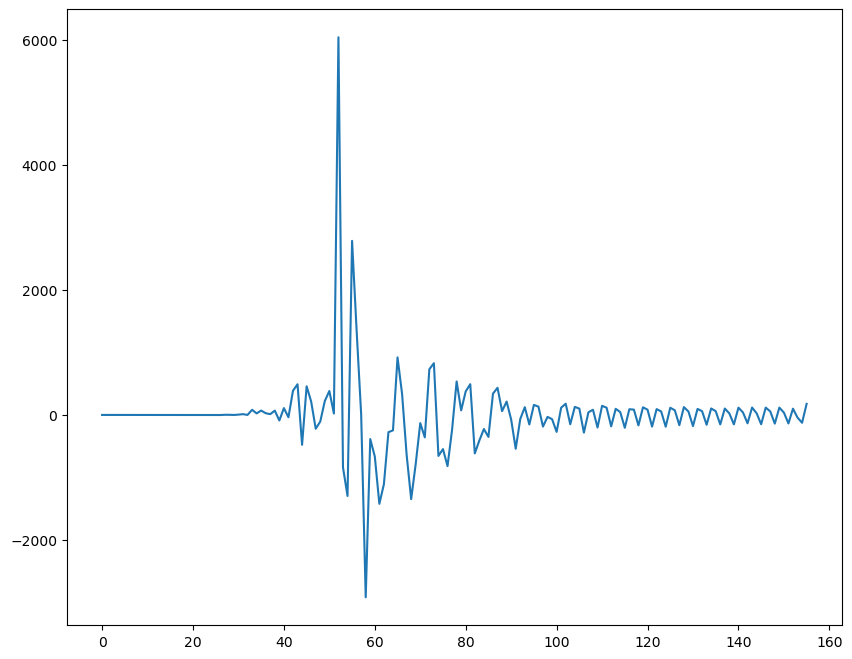

In [66]:
plt.figure(figsize=(10,8))
plt.plot(cancha)

In [67]:
stats.normaltest(cancha)#检验序列残差是否为正态分布    pvalue=0.00028625258929196876   <  0.05  拒绝原假设 认为残差符合正太分布

NormaltestResult(statistic=187.085504610486, pvalue=2.370821471440228e-41)

In [68]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(arima214.resid.values)     ##DW检验：靠近2——正常；靠近0——正自相关；靠近4——负自相关

1.9144208700212086

<Figure size 2500x1500 with 0 Axes>

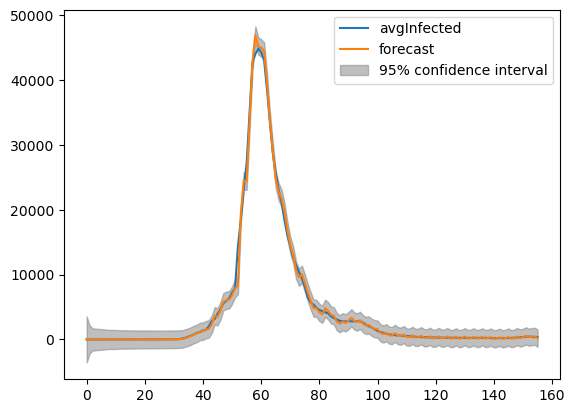

In [69]:
# 绘制原数据和预测数据对比图
from statsmodels.graphics.tsaplots import plot_predict
plt.figure(figsize=(25,15))
fig, ax = plt.subplots()
ax = df['avgInfected'].loc[:].plot(ax=ax)
plot_predict(arima214,dynamic=False,ax=ax,plot_insample=False)

plt.legend()
plt.show()

In [72]:
#回归评价指标

from sklearn import metrics


MSE = metrics.mean_squared_error( df['avgInfected'][122:], df_pred['predict'][2:])

RMSE = metrics.mean_squared_error( df['avgInfected'][122:], df_pred['predict'][2:])**0.5

MAE = metrics.mean_absolute_error( df['avgInfected'][122:], df_pred['predict'][2:])

MAPE = metrics.mean_absolute_percentage_error( df['avgInfected'][122:], df_pred['predict'][2:])

print(MSE,',',RMSE,',',MAE,',',MAPE)

13277.744666296694 , 115.22909643964364 , 105.51893955667089 , 0.40275758668886896


# LSTM model for resid prediction

In [26]:
import torch
from torch import nn

In [27]:
# LSTM model for accumulated infected people prediction


# data preprocessing

df_resid = pd.read_csv('cancha.csv')
df_resid.columns = ['day','resid']

value = df_resid['resid'].values
print(len(value)) 

mean = np.mean(value, axis=0)  # mean
v = np.std(value, axis=0) # variance
value = (value - mean) / v # data normalization
print("mean:",mean, "std:", v)
x = []
y = []
seq = 2

# manually add x and y, in the data sequence, set first 3 data as x and 1 data as y
for i in range(len(value)-seq):
    x.append(value[i:i+seq])
    y.append(value[i+seq])
print(len(x))   # 159

# model training need 3-dim tensor, reshape data as several sets with 3 rows % 1 column shape
train_x = (torch.tensor(x[:120]).float()).reshape(-1, seq, 1)
train_y = (torch.tensor(y[:120]).float()).reshape(-1, 1)
test_x = (torch.tensor(x[120:156]).float()).reshape(-1, seq, 1)
test_y = (torch.tensor(y[120:156]).float()).reshape(-1, 1)

print('len train_x:',len(train_x))
print('len test_x',len(test_x))

# LSTM Model training
class LSTM(nn.Module):
    
    # 调用LSTM class的时候自动执行__init__函数
    def __init__(self): # self用于传递对象本身
        # The super call delegates the function call to the parent class, which is nn.Module in your case
        # parent：nn.Model; child: LSTM
        # 子类LSTM把父类nn.Module的__init__()放到自己的__init__()当中，这样子类就有了父类的__init__()的那些东西
        super(LSTM, self).__init__()
        # LSTM layer
        # hidden_size:feature dim of LSTM layer; 
        # num_layer: 堆叠的LSTM的层数；
        # batch_first： 如果是True，则input为(batch, seq, input_size)
        self.lstm = nn.LSTM(input_size=1, hidden_size=32, num_layers=1, batch_first=True)
        
        # linear layer
        #设置网络中的全连接层的, in_feature = 32*sequence, out_feature = 1
        self.linear = nn.Linear(32 * seq, 1)
    
    # forward proprogation
    # output(seq_len, batch, hidden_size * num_directions),输出格式受batch_first的影响
    # hn(num_layers * num_directions, batch, hidden_size)，输出格式不受batch_first的影响
    # cn(num_layers * num_directions, batch, hidden_size)，输出格式不受batch_first的影响

    def forward(self, x):
        # x is total output(all h), h is current output, c is value in memory unit 
        x, (h, c) = self.lstm(x)
        # print('x after LSTM forward:',x)
        x = x.reshape(-1, 32 * seq)
        # print('x as dense layer input:',x)
        x = self.linear(x)
        # print('x as dense layer output:',x)
        return x

model = LSTM()
optimzer = torch.optim.Adam(model.parameters(), lr=0.005)
loss_func = nn.MSELoss()
model.train()

# backward training
# update net 800 times
for epoch in range(800):
    output = model(train_x) # input: train_x:(batch, sequence, input_size)
    loss = loss_func(output, train_y) # returnMSE between y predicted and train_y
    optimzer.zero_grad() # remove previous gradient
    loss.backward() # backward propagation to calculate current gradient
    optimzer.step() # update net based on current gradient
    # print loss every 20 times
    if epoch % 20 == 0:
        tess_loss = loss_func(model(test_x), test_y)
        print("epoch:{}, train_loss:{}, test_loss:{}".format(epoch, loss, tess_loss))


156
mean: 0.949554041252552 std: 678.6156448326188
154
len train_x: 120
len test_x 34
epoch:0, train_loss:1.2962887287139893, test_loss:0.03055691346526146
epoch:20, train_loss:1.2235854864120483, test_loss:0.02722187712788582
epoch:40, train_loss:1.1771363019943237, test_loss:0.041268397122621536
epoch:60, train_loss:1.1454309225082397, test_loss:0.04527759924530983
epoch:80, train_loss:1.0721049308776855, test_loss:0.051853206008672714
epoch:100, train_loss:1.0139309167861938, test_loss:0.05228443816304207
epoch:120, train_loss:0.9928407073020935, test_loss:0.05749242752790451
epoch:140, train_loss:0.9616730213165283, test_loss:0.060336071997880936
epoch:160, train_loss:0.9043092727661133, test_loss:0.053952090442180634
epoch:180, train_loss:0.8156916499137878, test_loss:0.056381549686193466
epoch:200, train_loss:0.6833962202072144, test_loss:0.041024066507816315
epoch:220, train_loss:0.5044205188751221, test_loss:0.03210446983575821
epoch:240, train_loss:0.3427937626838684, test_los

len value: 156
len prediction: 154


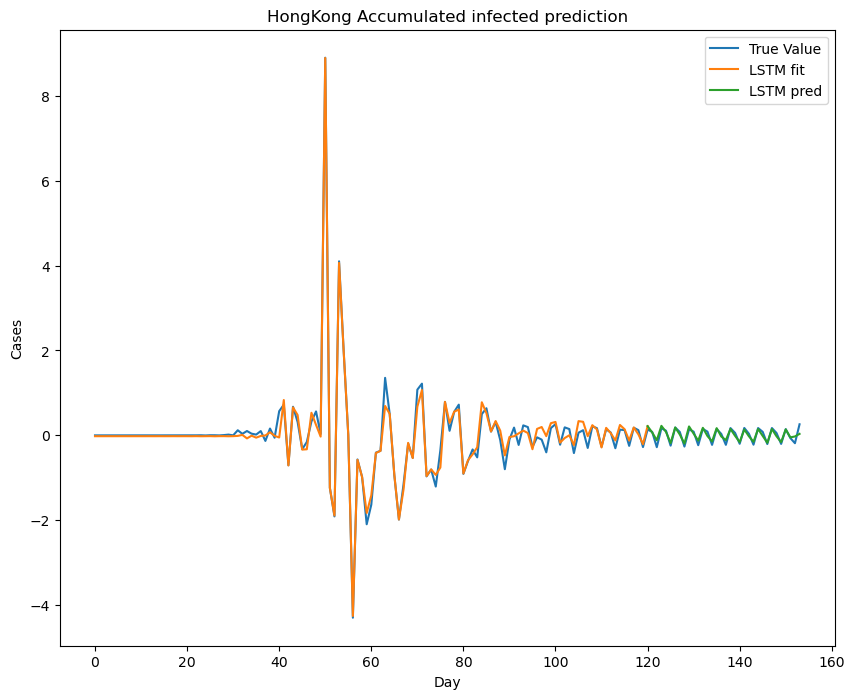

In [29]:
# model prediction and plot
plt.figure(figsize = (10,8))
model.eval()
pre_train = model(train_x).data.reshape(-1)
pre_test = model(test_x).data.reshape(-1)
prediction = list((model(train_x).data.reshape(-1))) + list((model(test_x).data.reshape(-1)))
plt.plot(value[2:], label='True Value')
plt.plot(prediction[:121], label='LSTM fit')
plt.plot(np.arange(120, 154, 1), prediction[120:154], label='LSTM pred')
print('len value:', len(value[:]))
print('len prediction:', len(prediction))
plt.legend(loc='best')
plt.title('HongKong Accumulated infected prediction')
plt.xlabel('Day')
plt.ylabel('Cases')
plt.show()

In [52]:
result1 = [i*v+mean for i in prediction]
value_inv= value*v+mean


pandas.core.frame.DataFrame

In [57]:
len(result1)
len(df_pred)

36

In [58]:
result = []
for i in range(34):
    tmp = df_pred['predict'][i+2]+result1[i+120]
    result.append(tmp)

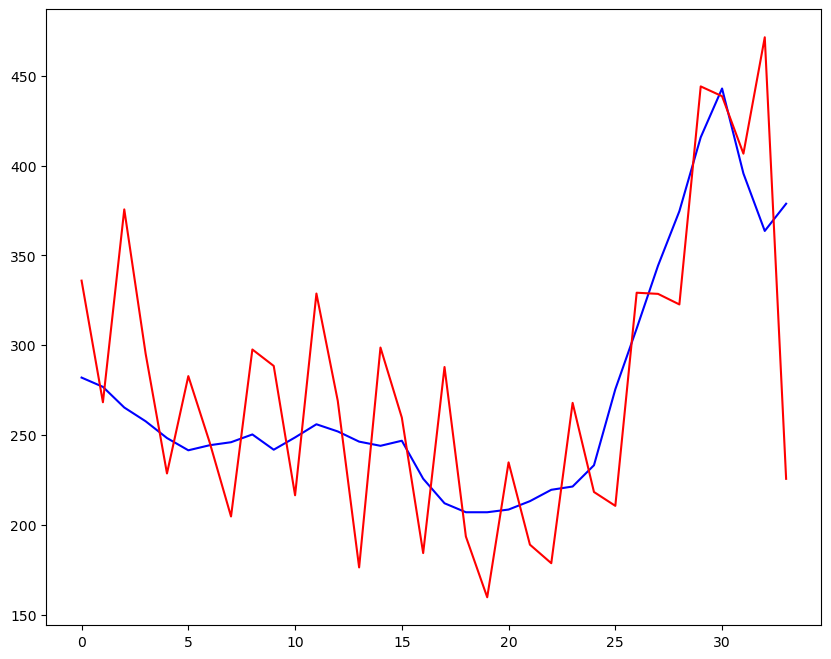

In [61]:
x800 = np.arange(0,34)
plt.figure(figsize = (10,8))
plt.plot(x800,df['avgInfected'][122:],color = 'blue')
plt.plot(x800,result,color = 'red')

In [63]:
from sklearn import metrics

MSE = metrics.mean_squared_error(result[:], df['avgInfected'][122:])
RMSE = metrics.mean_squared_error(result[:], df['avgInfected'][122:])**0.5
MAE = metrics.mean_absolute_error(result[:], df['avgInfected'][122:])
MAPE = metrics.mean_absolute_percentage_error(result[:], df['avgInfected'][122:])
print(MSE,',',RMSE,',',MAE,',',MAPE)

2892.8052761213416 , 53.78480525316924 , 42.8384900261374 , 0.16445320984143216
